# Testsystem 2 #

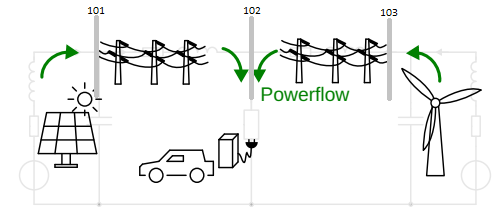

Systemerstellung mit .RAW Datei

0, 100, 33, 0, 0, 60  / 24-Apr-2020 19:28:39 - MATPOWER 7.0.1-dev


     101, 'BUS 1       ',       138, 3,    1,    1, 1,           1.02,        0,  1.1,  0.9,  1.1,  0.9
     102, 'BUS 2       ',       138, 2,    1,    1, 1,           1.0142,           0,  1.1,  0.9,  1.1,  0.9
     103, 'BUS 3       ',       138, 2,    1,    1, 1,           1.0059,           0,  1.1,  0.9,  1.1,  0.9
0 / END OF BUS DATA, BEGIN LOAD DATA
     102,  1, 1,    1,    1,       70,       10, 0, 0, 0, 0, 1, 1, 0
0 / END OF LOAD DATA, BEGIN FIXED SHUNT DATA
0 / END OF FIXED SHUNT DATA, BEGIN GENERATOR DATA
     101,  1,       20,         0,       100,      -100,    1.02, 0,     100, 0, 0, 0, 0, 1, 1, 100,       318,         0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1
     103,  1,       100,         0,       100,      -100,   1.0059, 0,     100, 0, 0.2, 0, 0, 1, 1, 100,       318,         0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1
0 / END OF GENERATOR DATA, BEGIN BRANCH DATA
     101,      102, 1,  0.01000,     0.12,      0.0,     250,     250,     250, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1
     102,      103, 1,  0.01000,     0.12,      0.0,     250,     250,     250, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1
0 / END OF BRANCH DATA, BEGIN TRANSFORMER DATA
0 / END OF TRANSFORMER DATA, BEGIN AREA DATA
0 / END OF AREA DATA, BEGIN TWO-TERMINAL DC DATA
0 / END OF TWO-TERMINAL DC DATA, BEGIN VOLTAGE SOURCE CONVERTER DATA
0 / END OF VOLTAGE SOURCE CONVERTER DATA, BEGIN IMPEDANCE CORRECTION DATA
0 / END OF IMPEDANCE CORRECTION DATA, BEGIN MULTI-TERMINAL DC DATA
0 / END OF MULTI-TERMINAL DC DATA, BEGIN MULTI-SECTION LINE DATA
0 / END OF MULTI-SECTION LINE DATA, BEGIN ZONE DATA
0 / END OF ZONE DATA, BEGIN INTER-AREA TRANSFER DATA
0 / END OF INTER-AREA TRANSFER DATA, BEGIN OWNER DATA
0 / END OF OWNER DATA, BEGIN FACTS CONTROL DEVICE DATA
0 / END OF FACTS CONTROL DEVICE DATA, BEGIN SWITCHED SHUNT DATA
0 / END OF SWITCHED SHUNT DATA, BEGIN GNE DEVICE DATA
0 / END OF GNE DEVICE DATA, BEGIN INDUCTION MACHINE DATA
0 / END OF INDUCTION MACHINE DATA
Q

Julia Packages einbinden

In [1]:
using PowerSystems, PowerSimulationsDynamics, PowerSystemCaseBuilder, Sundials, Plots, Logging, DisplayAs

Protokollierung konfigurieren

In [2]:
logger = configure_logging(console_level = Logging.Error, file_level = Logging.Info)

MultiLogger(Base.CoreLogging.AbstractLogger[ConsoleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(Base.Libc.WindowsRawSocket(0x00000000000003ac) open, 0 bytes waiting))), Error, Logging.default_metafmt, true, 0, Dict{Any, Int64}()), InfrastructureSystems.ProgressLogger(TerminalLoggers.TerminalLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(Base.Libc.WindowsRawSocket(0x00000000000003ac) open, 0 bytes waiting))), LogLevel(-1), TerminalLoggers.default_metafmt, true, 0, false, 0, Dict{Any, Int64}(), TerminalLoggers.StickyMessages(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(Base.Libc.WindowsRawSocket(0x00000000000003ac) open, 0 bytes waiting))), false, Pair{Any, String}[]), LeftChildRightSiblingTrees.Node{TerminalLoggers.ProgressBar}[], ReentrantLock(nothing, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), 0))), InfrastructureSystems.FileLogger(Ba

Datenpfad der .RAW Datei angeben

In [3]:
DATA_DIR = "D:\\Documents\\Studium\\SHK\\Tooblox_SIIP\\Test2"

"D:\\Documents\\Studium\\SHK\\Tooblox_SIIP\\Test2"

### System erstellen ###

In [4]:
test2_sys = System(joinpath(DATA_DIR, "test2_sys.raw"), runchecks = false)

System
┌───────────────────┬─────────────┐
│ Property          │ Value       │
├───────────────────┼─────────────┤
│ System Units Base │ SYSTEM_BASE │
│ Base Power        │ 100.0       │
│ Base Frequency    │ 60.0        │
│ Num Components    │ 12          │
└───────────────────┴─────────────┘

Static Components
┌─────────────────┬───────┬────────────────────────┬───────────────┐
│ Type            │ Count │ Has Static Time Series │ Has Forecasts │
├─────────────────┼───────┼────────────────────────┼───────────────┤
│ Arc             │ 2     │ false                  │ false         │
│ Area            │ 1     │ false                  │ false         │
│ Bus             │ 3     │ false                  │ false         │
│ Line            │ 2     │ false                  │ false         │
│ LoadZone        │ 1     │ false                  │ false         │
│ PowerLoad       │ 1     │ false                  │ false         │
│ ThermalStandard │ 2     │ false                  │ false         │
└─────────────────┴───────┴────────────────────────┴───────────────┘

### 6 Unterkomponenten der 2 Inverter erstellen ###
(Converter, Outer Control, Inner Control, DCSource, FrequenzEstimator, Filter)

In [5]:
converter_high_power = AverageConverter(rated_voltage = 138.0, rated_current = 100.0)

outer_cont = OuterControl(
    VirtualInertia(Ta = 2.0, kd = 400.0, kω = 20.0),
    ReactivePowerDroop(kq = 0.2, ωf = 1000.0),
)

inner_cont = VoltageModeControl(
    kpv = 0.59,     #Voltage controller proportional gain
    kiv = 736.0,    #Voltage controller integral gain
    kffv = 0.0,     #Binary variable enabling the voltage feed-forward in output of current controllers
    rv = 0.0,       #Virtual resistance in pu
    lv = 0.2,       #Virtual inductance in pu
    kpc = 1.27,     #Current controller proportional gain
    kic = 14.3,     #Current controller integral gain
    kffi = 0.0,     #Binary variable enabling the current feed-forward in output of current controllers
    ωad = 50.0,     #Active damping low pass filter cut-off frequency
    kad = 0.2,      #Active damping gain
)
#Inverter 1:
dc_source_lv1 = FixedDCSource(voltage = 600.0)
#Inverter 2:
dc_source_lv2 = FixedDCSource(voltage = 500.0)

pll = KauraPLL(
    ω_lp = 500.0, #Cut-off frequency for LowPass filter of PLL filter.
    kp_pll = 0.084,  #PLL proportional gain
    ki_pll = 4.69,   #PLL integral gain
)

#Filter:
filt = LCLFilter(lf = 0.08, rf = 0.003, cf = 0.074, lg = 0.2, rg = 0.01)

LCLFilter(0.08, 0.003, 0.074, 0.2, 0.01, Dict{String, Any}(), [:ir_cnv, :ii_cnv, :vr_filter, :vi_filter, :ir_filter, :ii_filter], 6)

### Inverter ins System einbringen durch Anheften an Static Generator

#### 1. Inverter

In [6]:
g = get_component(Generator, test2_sys, "generator-101-1")
        #Create the dynamic inverter
        case_inv1 = DynamicInverter(
                name = get_name(g),
                ω_ref = 1.0,
                converter = converter_high_power,
                outer_control = outer_cont,
                inner_control = inner_cont,
                dc_source = dc_source_lv1,
                freq_estimator = pll,
                filter = filt,
            )
add_component!(test2_sys, case_inv1,g)

#### 2. Inverter

In [7]:
g = get_component(Generator, test2_sys, "generator-103-1")
        #Create the dynamic inverter
        case_inv2 = DynamicInverter(
                name = get_name(g),
                ω_ref = 1.0,
                converter = converter_high_power,
                outer_control = outer_cont,
                inner_control = inner_cont,
                dc_source = dc_source_lv2,
                freq_estimator = pll,
                filter = filt,
            )
add_component!(test2_sys, case_inv2,g)

### Static lines -> dynamic lines

In [8]:
dyn_branch1 = DynamicBranch(get_component(Branch, test2_sys, "BUS 1-BUS 2-i_1"))
add_component!(test2_sys, dyn_branch1)

In [9]:
dyn_branch2 = DynamicBranch(get_component(Branch, test2_sys, "BUS 2-BUS 3-i_2"))
add_component!(test2_sys, dyn_branch2)

Simulationszeit:

In [10]:
time_span = (0.0, 30.0)

(0.0, 30.0)

### Störung erstellen:

In [11]:
g = get_component(DynamicInverter, test2_sys, "generator-101-1")
crc = ControlReferenceChange(6.0, g, :P_ref, 0.5)

Change of P_ref at time t = 6.0 of device generator-101-1 to 0.5 per unit


## Simulation aufbauen:

In [12]:
sim = Simulation!(ResidualModel, test2_sys, pwd(), time_span, crc)

Property,Value
Simulation Type,Residual Model
Initialized?,Yes
Multimachine system?,Yes
Time Span,"(0.0, 30.0)"
Number of States,48
Number of Perturbations,1


### Initialwerte der Simulation

In [13]:
x0_init = read_initial_conditions(sim)

Dict{String, Any} with 8 entries:
  "Line BUS 1-BUS 2-i_1" => Dict(:Il_I=>-0.199522, :Il_R=>-0.283243)
  "Line BUS 2-BUS 3-i_2" => Dict(:Il_I=>-0.124753, :Il_R=>-0.986715)
  "V_R"                  => Dict(103=>0.993787, 102=>0.99889, 101=>1.02)
  "Vm"                   => Dict(103=>1.0059, 102=>0.999538, 101=>1.02)
  "θ"                    => Dict(103=>0.155349, 102=>0.0360088, 101=>-2.07128e-…
  "V_I"                  => Dict(103=>0.155638, 102=>0.0359844, 101=>-2.1127e-8)
  "generator-103-1"      => Dict(:vi_filter=>0.354228, :γd_ic=>0.0718429, :vq_p…
  "generator-101-1"      => Dict(:vi_filter=>-0.0586439, :γd_ic=>0.0738893, :vq…

In [14]:
show_states_initial_value(sim)

Voltage Variables
BUS 1
Vm 1.02
θ -0.0
BUS 2
Vm 0.9995
θ 0.036
BUS 3
Vm 1.0059
θ 0.1553
Differential States
generator-103-1
θ_oc 0.5243
ω_oc 1.0
q_oc 0.2274
ξd_ic 0.0012
ξq_ic -0.0005
γd_ic 0.0718
γq_ic -0.0129
ϕd_ic 1.0246
ϕq_ic -0.1833
vd_pll 1.0408
vq_pll 0.0
ε_pll -0.0
θ_pll 0.3473
ir_cnv 0.9605
ii_cnv 0.1972
vr_filter 0.9787
vi_filter 0.3542
ir_filter 0.9867
ii_filter 0.1248
Differential States
generator-101-1
θ_oc -0.1047
ω_oc 1.0
q_oc 0.2275
ξd_ic -0.0004
ξq_ic -0.0003
γd_ic 0.0739
γq_ic 0.0036
ϕd_ic 1.0574
ϕq_ic 0.0522
vd_pll 1.0587
vq_pll 0.0
ε_pll 0.0
θ_pll -0.0554
ir_cnv -0.2789
ii_cnv -0.1213
vr_filter 1.0571
vi_filter -0.0586
ir_filter -0.2832
ii_filter -0.1995
Line Current States
Line BUS 1-BUS 2-i_1
Il_R -0.28324
Il_I -0.19952
Line BUS 2-BUS 3-i_2
Il_R -0.98671
Il_I -0.12475


## Simulation ausführen

In [15]:
execute!(sim, IDA(), dtmax = 0.02, saveat = 0.02, enable_progress_bar = false)

SIMULATION_FINALIZED::BUILD_STATUS = 6

## Simulationsergebnisse untersuchen bzw. visualisieren

In [16]:
results = read_results(sim)

Property,Value
System Base Power [MVA],100.0
System Base Frequency [Hz],60.0
Time Span,"(0.0, 30.0)"
Total Time Steps,1503
Number of States,48
Total solve time,3.9618905


### System:

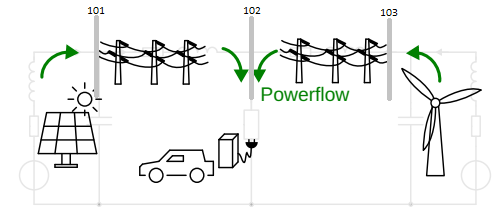

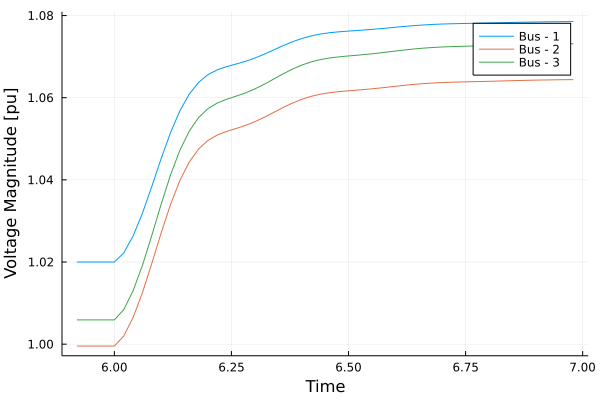

In [17]:
v1=get_voltage_magnitude_series(results, 101)
v2=get_voltage_magnitude_series(results, 102)
v3=get_voltage_magnitude_series(results, 103)
zoom_v1 = [
    (v1[1][ix], v1[2][ix]) for
    (ix, s) in enumerate(v1[1]) if (s > 5.90 && s < 7)
];
zoom_v2 = [
    (v2[1][ix], v2[2][ix]) for
    (ix, s) in enumerate(v2[1]) if (s > 5.90 && s < 7)
];
zoom_v3 = [
    (v3[1][ix], v3[2][ix]) for
    (ix, s) in enumerate(v3[1]) if (s > 5.90 && s < 7)
];
Voltages=[zoom_v1,zoom_v2,zoom_v3]
p = plot()
for i in 1:3
    plot!(
        p,
        Voltages[i];
        xlabel = "Time",
        ylabel = "Voltage Magnitude [pu]",
        label = "Bus - $i",
    )
end
img = DisplayAs.PNG(p)

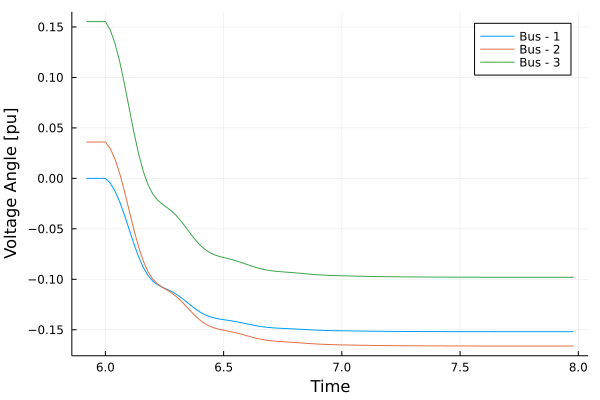

In [18]:
v1=get_voltage_angle_series(results, 101)
v2=get_voltage_angle_series(results, 102)
v3=get_voltage_angle_series(results, 103)
zoom_v1 = [
    (v1[1][ix], v1[2][ix]) for
    (ix, s) in enumerate(v1[1]) if (s > 5.90 && s < 8)
];
zoom_v2 = [
    (v2[1][ix], v2[2][ix]) for
    (ix, s) in enumerate(v2[1]) if (s > 5.90 && s < 8)
];
zoom_v3 = [
    (v3[1][ix], v3[2][ix]) for
    (ix, s) in enumerate(v3[1]) if (s > 5.90 && s < 8)
];
angles=[zoom_v1,zoom_v2,zoom_v3]
q = plot()
for i in 1:3
    plot!(
        q,
        angles[i];
        xlabel = "Time",
        ylabel = "Voltage Angle [pu]",
        label = "Bus - $i",
    )
end
img = DisplayAs.PNG(q)

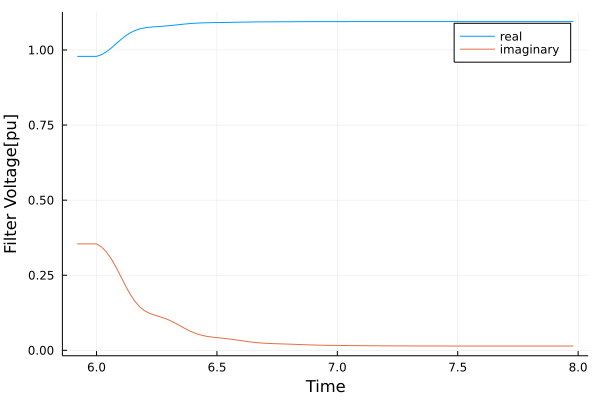

In [19]:
v1=get_state_series(results, ("generator-103-1", :vr_filter))
v2=get_state_series(results, ("generator-103-1", :vi_filter))
zoom_v1 = [
    (v1[1][ix], v1[2][ix]) for
    (ix, s) in enumerate(v1[1]) if (s > 5.90 && s < 8)
];
zoom_v2 = [
    (v2[1][ix], v2[2][ix]) for
    (ix, s) in enumerate(v2[1]) if (s > 5.90 && s < 8)
];

Vfilter=[zoom_v1,zoom_v2]
s = plot()
plot!(
        s,
        Vfilter[1];
        xlabel = "Time",
        ylabel = "Filter Voltage[pu]",
        label = "real",
    )
plot!(
        s,
        Vfilter[2];
        xlabel = "Time",
        ylabel = "Filter Voltage[pu]",
        label = "imaginary",
    )
img = DisplayAs.PNG(s)

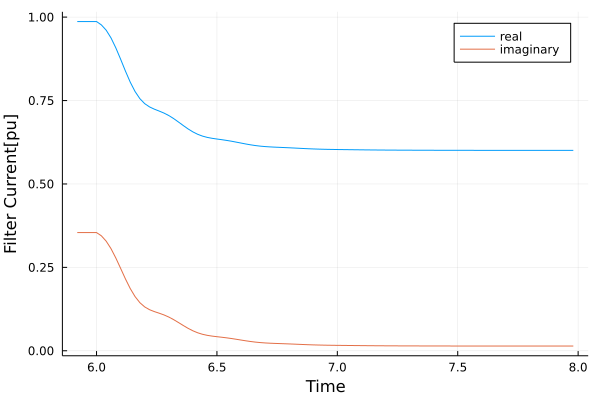

In [20]:

v1=get_state_series(results, ("generator-103-1", :ir_filter))
v2=get_state_series(results, ("generator-103-1", :ii_filter))
zoom_v1 = [
    (v1[1][ix], v1[2][ix]) for
    (ix, s) in enumerate(v1[1]) if (s > 5.90 && s < 8)
];
zoom_v2 = [
    (v2[1][ix], v2[2][ix]) for
    (ix, s) in enumerate(v2[1]) if (s > 5.90 && s < 8)
];

Ifilter=[zoom_v1,zoom_v2]
s = plot()
plot!(
        s,
        Ifilter[1];
        xlabel = "Time",
        ylabel = "Filter Current[pu]",
        label = "real",
    )
plot!(
        s,
        Vfilter[2];
        xlabel = "Time",
        ylabel = "Filter Current[pu]",
        label = "imaginary",
    )
img = DisplayAs.PNG(s)